<a href="https://colab.research.google.com/github/Fatulla/FatullaAliyev/blob/main/Fatulla_Aliyev_Cars_Price_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from math import sqrt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("Cars_dataset.csv")

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head(20)

,Brand,City,Prod_Year,Ban_Type,Color,Mileage,Crashed,Price_clean,IsShop,EngineVolume,EngineForce,EngineFuel,HasDamaged,IsColored,Transmission,Gear,IsNew_Digit,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,Brand_Model,Seats_Count
0,Abarth,Bakı,2012,Hetçbek,Qara,163000,0,17300,0.0,1.4,180,Benzin,0.0,0.0,Mexaniki,Ön,0,1,1,1,0,1,0,1,0,1,1,0,0,0,Abarth 595,3
1,Abarth,Bakı,2013,Hetçbek,Qara,150000,0,18000,1.0,1.4,200,Benzin,0.0,0.0,Mexaniki,Ön,0,1,1,0,1,1,1,1,0,0,1,1,0,0,Abarth 595,3
2,Abarth,Bakı,2017,Hetçbek,Yaş Asfalt,56500,0,29750,0.0,1.4,180,Benzin,0.0,0.0,Avtomat,Ön,0,1,1,1,1,1,1,1,0,0,1,1,1,0,Abarth 595,3
3,Acura,Bakı,2011,Offroader / SUV,Ağ,70000,0,32300,1.0,3.7,300,Benzin,0.0,0.0,Avtomat,Tam,0,1,1,1,1,1,0,1,1,1,1,1,0,1,Acura MDX,6
4,Acura,Bakı,2012,Offroader / SUV,Ağ,69900,0,33150,0.0,3.7,300,Benzin,0.0,0.0,Avtomat,Tam,0,1,1,1,1,1,1,1,1,1,1,1,0,1,Acura MDX,6
5,Alfa Romeo,Bakı,2017,Kupe,Ağ,10000,0,93500,0.0,1.7,240,Benzin,0.0,0.0,Avtomat,Arxa,0,1,1,0,1,1,1,1,1,1,1,0,0,0,Alfa Romeo 4C,1
6,Alfa Romeo,Bakı,2020,Sedan,Qara,32817,0,64600,0.0,2.0,200,Benzin,0.0,0.0,Avtomat,Arxa,0,1,1,0,1,1,1,1,0,1,1,1,0,0,Alfa Romeo Giulia,4
7,Alfa Romeo,Bakı,2022,Sedan,Qara,0,0,91136,1.0,2.0,280,Benzin,0.0,0.0,Avtomat,Tam,1,1,1,1,1,1,1,1,1,1,1,1,0,1,Alfa Romeo Giulia,3
8,Alfa Romeo,Bakı,2022,Sedan,Qara,0,0,156696,1.0,2.9,510,Benzin,0.0,0.0,Avtomat,Arxa,1,1,1,0,1,1,1,1,1,1,1,1,1,0,Alfa Romeo Giulia,4
9,Alfa Romeo,Bakı,2017,Hetçbek,Boz,42000,0,20000,0.0,1.4,140,Benzin,1.0,0.0,Avtomat,Ön,0,0,0,0,0,0,0,1,0,1,0,0,0,0,Alfa Romeo Mito,4


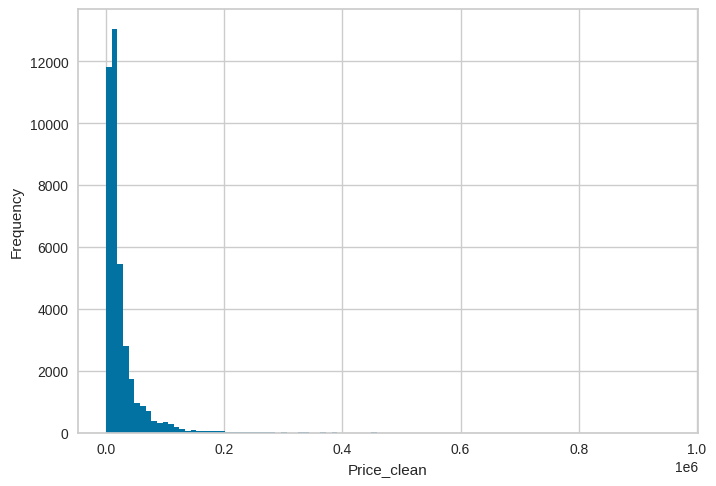

In [7]:
price_clean = data['Price_clean']
plt.hist(price_clean, bins=100)
plt.xlabel('Price_clean')
plt.ylabel('Frequency')
plt.show()

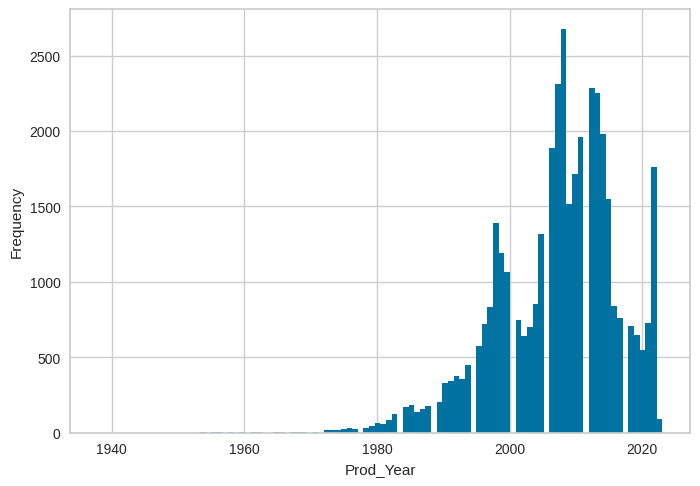

In [8]:
price_clean = data['Prod_Year']
plt.hist(price_clean, bins=100)
plt.xlabel('Prod_Year')
plt.ylabel('Frequency')
plt.show()

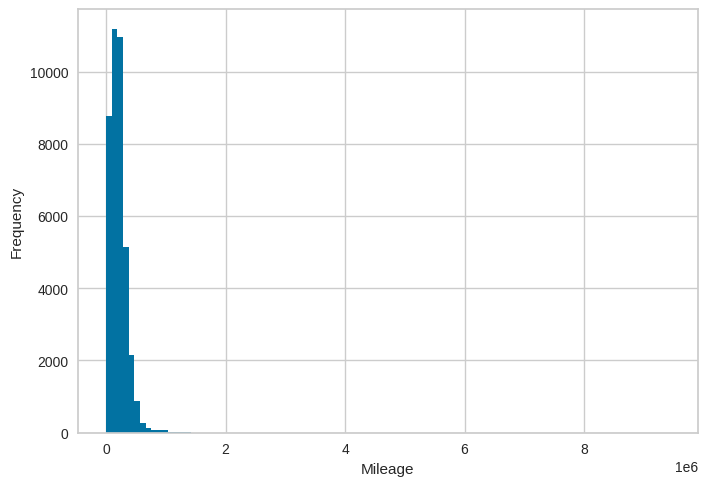

In [9]:
price_clean = data['Mileage']
plt.hist(price_clean, bins=100)
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

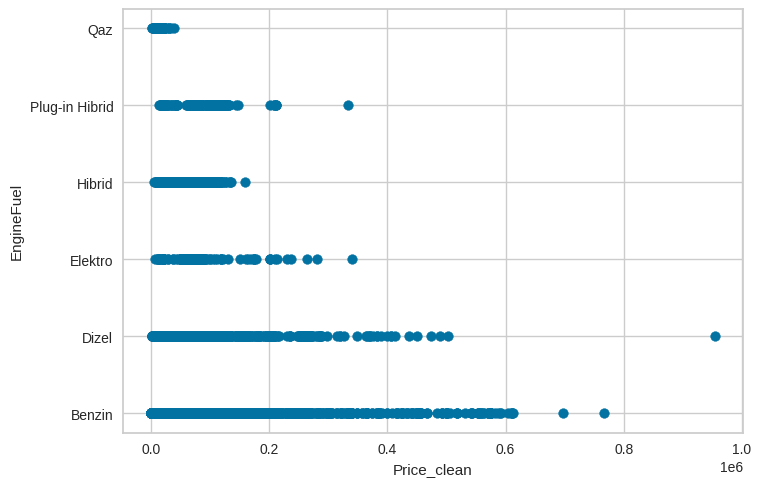

In [10]:
price_clean = data['Price_clean']
engine_fuel = data['EngineFuel']

plt.scatter(price_clean, engine_fuel)
plt.xlabel('Price_clean')
plt.ylabel('EngineFuel')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 601 (\N{LATIN SMALL LETTER SCHWA}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


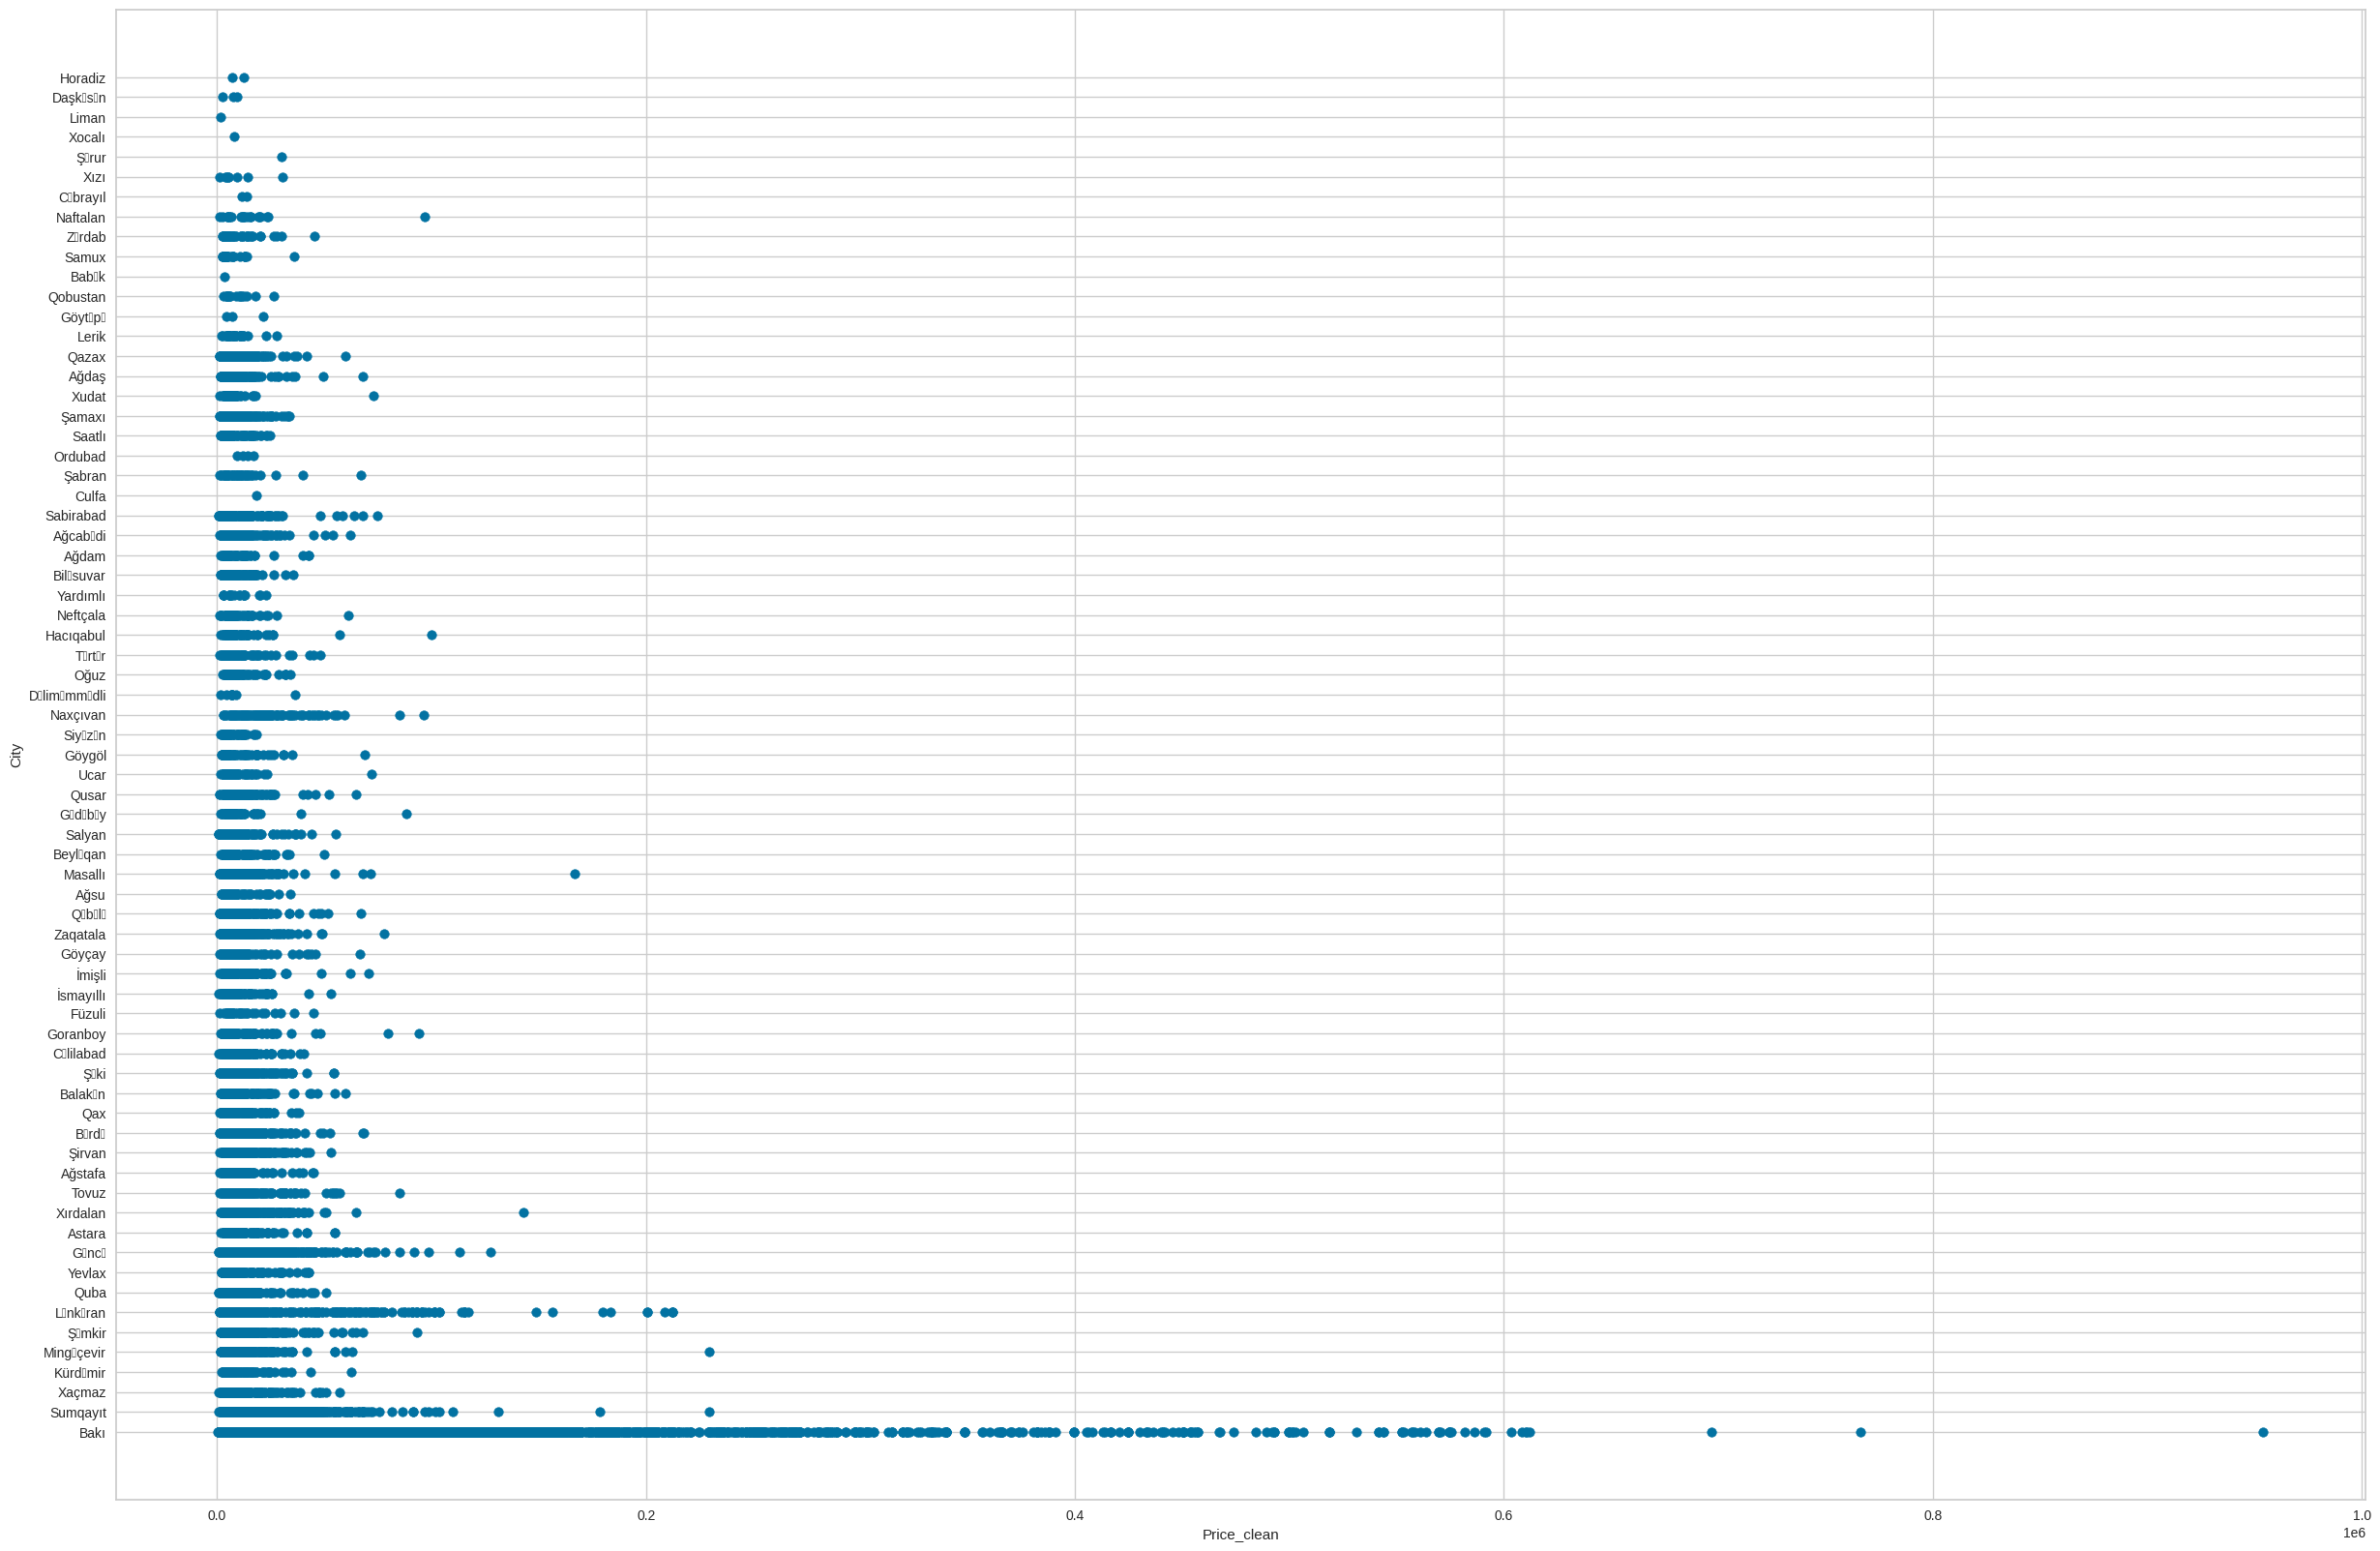

In [11]:
plt.figure(figsize=(30, 20))
price_clean = data['Price_clean']
engine_fuel = data['City']
plt.scatter(price_clean, engine_fuel)
plt.xlabel('Price_clean')
plt.ylabel('City')
plt.show()

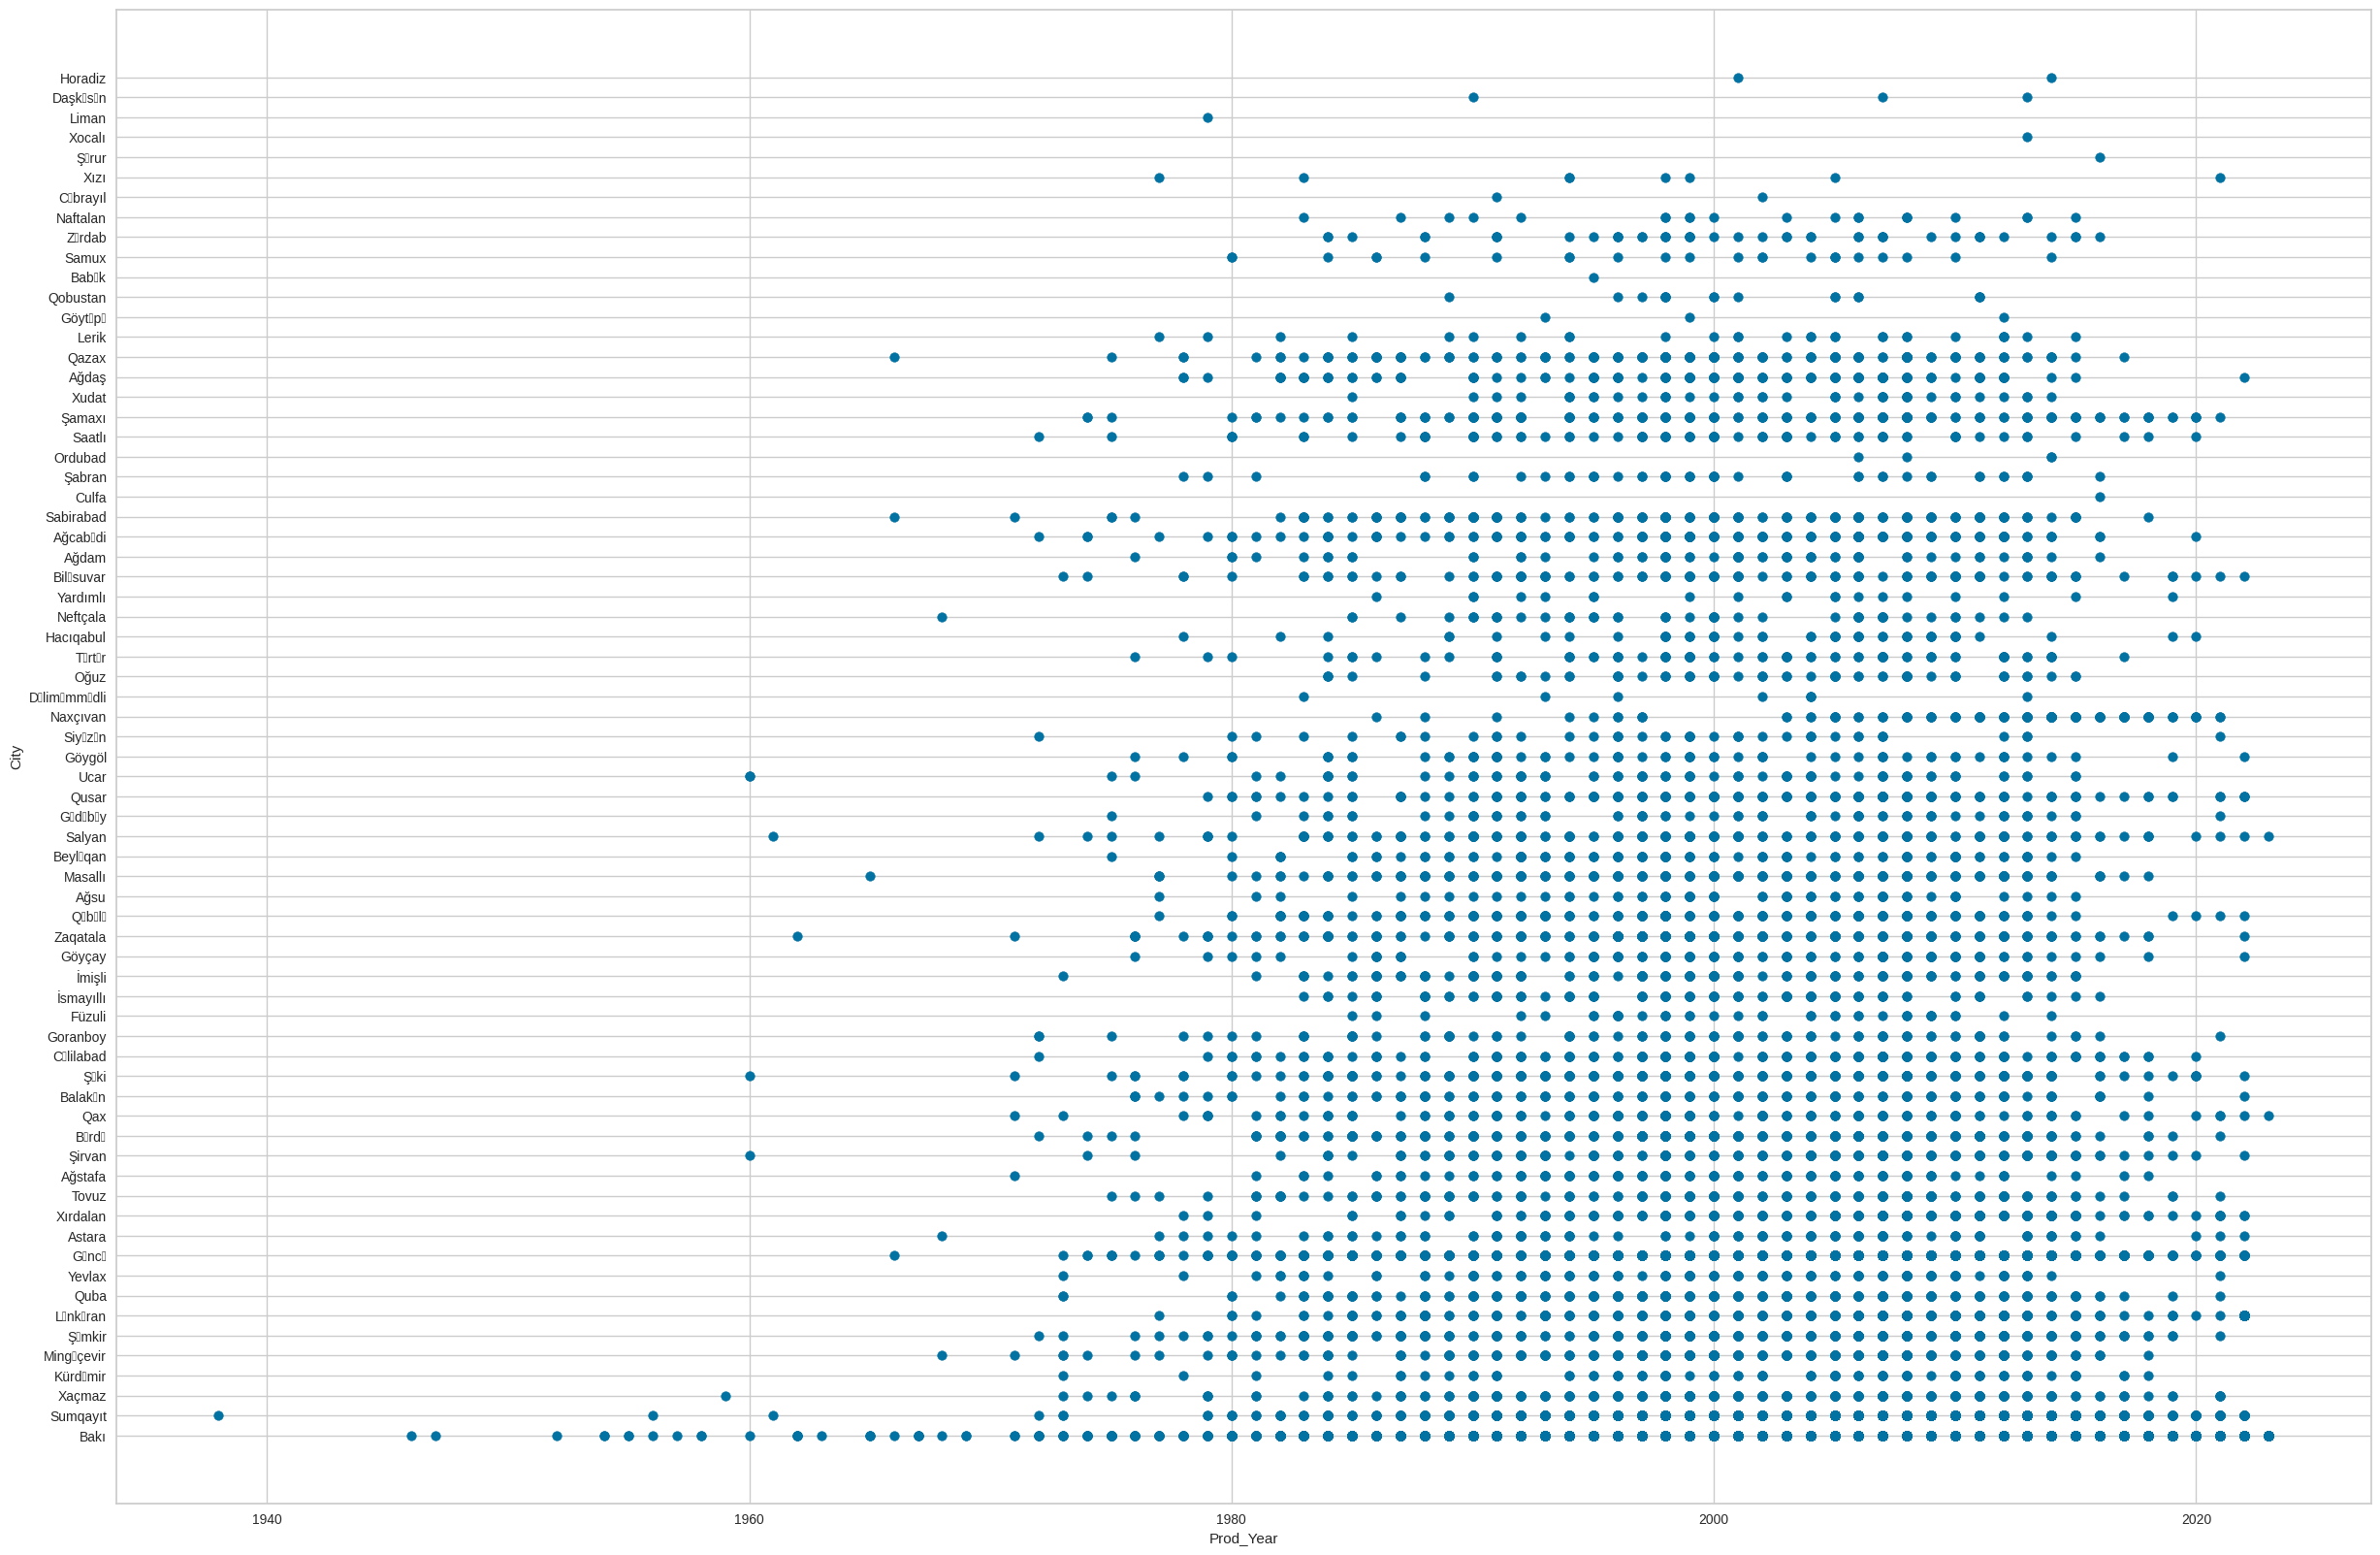

In [12]:
plt.figure(figsize=(30, 20))
price_clean = data['Prod_Year']
engine_fuel = data['City']
plt.scatter(price_clean, engine_fuel)
plt.xlabel('Prod_Year')
plt.ylabel('City')
plt.show()

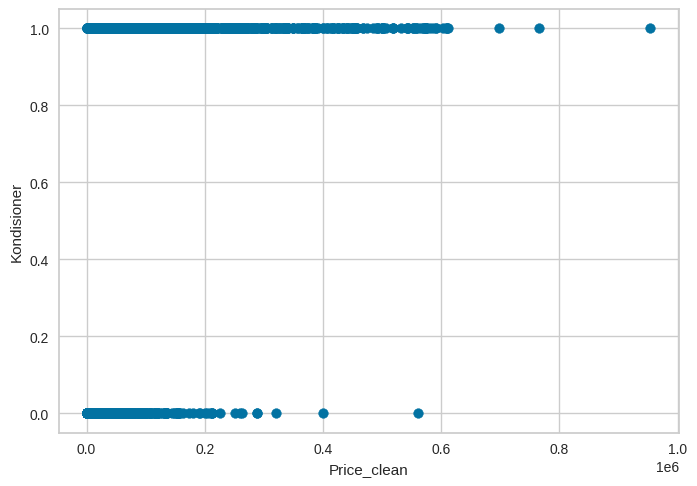

In [13]:
price_clean = data['Price_clean']
engine_fuel = data['Kondisioner']
plt.scatter(price_clean, engine_fuel)
plt.xlabel('Price_clean')
plt.ylabel('Kondisioner')
plt.show()

In [14]:
data.columns

Index(['Brand', 'City', 'Prod_Year', 'Ban_Type', 'Color', 'Mileage', 'Crashed',
       'Price_clean', 'IsShop', 'EngineVolume', 'EngineForce', 'EngineFuel',
       'HasDamaged', 'IsColored', 'Transmission', 'Gear', 'IsNew_Digit',
       'Yüngül lehimli disklər', 'ABS', 'Lyuk', 'Yağış sensoru',
       'Mərkəzi qapanma', 'Park radarı', 'Kondisioner',
       'Oturacaqların isidilməsi', 'Dəri salon', 'Ksenon lampalar',
       'Arxa görüntü kamerası', 'Yan pərdələr', 'Oturacaqların ventilyasiyası',
       'Brand_Model', 'Seats_Count'],
      dtype='object')

In [15]:
data.isnull().sum()

,0
Brand,0
City,0
Prod_Year,0
Ban_Type,0
Color,0
Mileage,0
Crashed,0
Price_clean,0
IsShop,0
EngineVolume,0


In [16]:
le = LabelEncoder()
data["Brand"] = le.fit_transform(data["Brand"])
data["City"] = le.fit_transform(data["City"])
data["Ban_Type"] = le.fit_transform(data["Ban_Type"])
data["Color"] = le.fit_transform(data["Color"])
data["Brand_Model"] = le.fit_transform(data["Brand_Model"])

In [17]:
enginefuel_dummy = pd.get_dummies(data["EngineFuel"], prefix="EngineFuel")
transmission_dummy = pd.get_dummies(data["Transmission"], prefix="Transmission")
gear_dummy = pd.get_dummies(data["Gear"], prefix="Gear")
data = pd.concat([data, enginefuel_dummy, transmission_dummy, gear_dummy], axis=1)
data = data.drop(["EngineFuel", "Transmission", "Gear"], axis=1)

In [18]:
data.head()

,Brand,City,Prod_Year,Ban_Type,Color,Mileage,Crashed,Price_clean,IsShop,EngineVolume,EngineForce,HasDamaged,IsColored,IsNew_Digit,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,Brand_Model,Seats_Count,EngineFuel_Benzin,EngineFuel_Dizel,EngineFuel_Elektro,EngineFuel_Hibrid,EngineFuel_Plug-in Hibrid,EngineFuel_Qaz,Transmission_Avtomat,Transmission_Mexaniki,Transmission_Robotlaşdırılmış,Transmission_Variator,Gear_Arxa,Gear_Tam,Gear_Ön
0,0,7,2012,3,8,163000,0,17300,0.0,1.4,180,0.0,0.0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,3,True,False,False,False,False,False,False,True,False,False,False,False,True
1,0,7,2013,3,8,150000,0,18000,1.0,1.4,200,0.0,0.0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,3,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,7,2017,3,14,56500,0,29750,0.0,1.4,180,0.0,0.0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,3,True,False,False,False,False,False,True,False,False,False,False,False,True
3,1,7,2011,13,0,70000,0,32300,1.0,3.7,300,0.0,0.0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,6,True,False,False,False,False,False,True,False,False,False,False,True,False
4,1,7,2012,13,0,69900,0,33150,0.0,3.7,300,0.0,0.0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,6,True,False,False,False,False,False,True,False,False,False,False,True,False


In [19]:
data.columns

Index(['Brand', 'City', 'Prod_Year', 'Ban_Type', 'Color', 'Mileage', 'Crashed',
       'Price_clean', 'IsShop', 'EngineVolume', 'EngineForce', 'HasDamaged',
       'IsColored', 'IsNew_Digit', 'Yüngül lehimli disklər', 'ABS', 'Lyuk',
       'Yağış sensoru', 'Mərkəzi qapanma', 'Park radarı', 'Kondisioner',
       'Oturacaqların isidilməsi', 'Dəri salon', 'Ksenon lampalar',
       'Arxa görüntü kamerası', 'Yan pərdələr', 'Oturacaqların ventilyasiyası',
       'Brand_Model', 'Seats_Count', 'EngineFuel_Benzin', 'EngineFuel_Dizel',
       'EngineFuel_Elektro', 'EngineFuel_Hibrid', 'EngineFuel_Plug-in Hibrid',
       'EngineFuel_Qaz', 'Transmission_Avtomat', 'Transmission_Mexaniki',
       'Transmission_Robotlaşdırılmış', 'Transmission_Variator', 'Gear_Arxa',
       'Gear_Tam', 'Gear_Ön'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39748 entries, 0 to 39747
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand                          39748 non-null  int64  
 1   City                           39748 non-null  int64  
 2   Prod_Year                      39748 non-null  int64  
 3   Ban_Type                       39748 non-null  int64  
 4   Color                          39748 non-null  int64  
 5   Mileage                        39748 non-null  int64  
 6   Crashed                        39748 non-null  int64  
 7   Price_clean                    39748 non-null  int64  
 8   IsShop                         39748 non-null  float64
 9   EngineVolume                   39748 non-null  float64
 10  EngineForce                    39748 non-null  int64  
 11  HasDamaged                     39748 non-null  float64
 12  IsColored                      39748 non-null 

In [21]:
data.describe()

,Brand,City,Prod_Year,Ban_Type,Color,Mileage,Crashed,Price_clean,IsShop,EngineVolume,EngineForce,HasDamaged,IsColored,IsNew_Digit,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,Brand_Model,Seats_Count
count,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,3.974800e+04,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000,39748.000000
mean,78.638070,16.789222,2007.241044,14.044405,5.303512,2.036743e+05,0.005258,26692.543675,0.143529,2.222942,159.871666,0.022794,0.115956,0.039373,0.777272,0.764994,0.384095,0.524530,0.749245,0.468703,0.741446,0.444299,0.434890,0.500176,0.455344,0.430034,0.284467,788.062720,3.994465
std,35.169373,17.552694,9.107496,4.844326,4.551399,1.633052e+05,0.072323,41155.199147,0.350616,1.342206,89.407561,0.149247,0.320176,0.194483,0.416083,0.424008,0.486387,0.499404,0.433453,0.499026,0.437845,0.496894,0.495749,0.500006,0.498008,0.495087,0.451166,396.651209,1.000022
min,0.000000,0.000000,1938.000000,0.000000,0.000000,0.000000e+00,0.000000,500.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,7.000000,2001.000000,13.000000,0.000000,1.040000e+05,0.000000,8700.000000,0.000000,1.600000,97.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,523.000000,4.000000
50%,81.000000,7.000000,2008.000000,17.000000,5.000000,1.880000e+05,0.000000,14500.000000,0.000000,2.000000,140.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,723.000000,4.000000
75%,94.000000,23.000000,2013.000000,17.000000,8.000000,2.700000e+05,0.000000,28000.000000,0.000000,2.400000,184.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1120.000000,4.000000
max,154.000000,68.000000,2023.000000,20.000000,16.000000,9.434946e+06,1.000000,954000.000000,1.000000,16.000000,1701.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1555.000000,7.000000


In [22]:
corr_matrix = data.corr()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 601 (\N{LATIN SMALL LETTER SCHWA}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 601 (\N{LATIN SMALL LETTER SCHWA}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


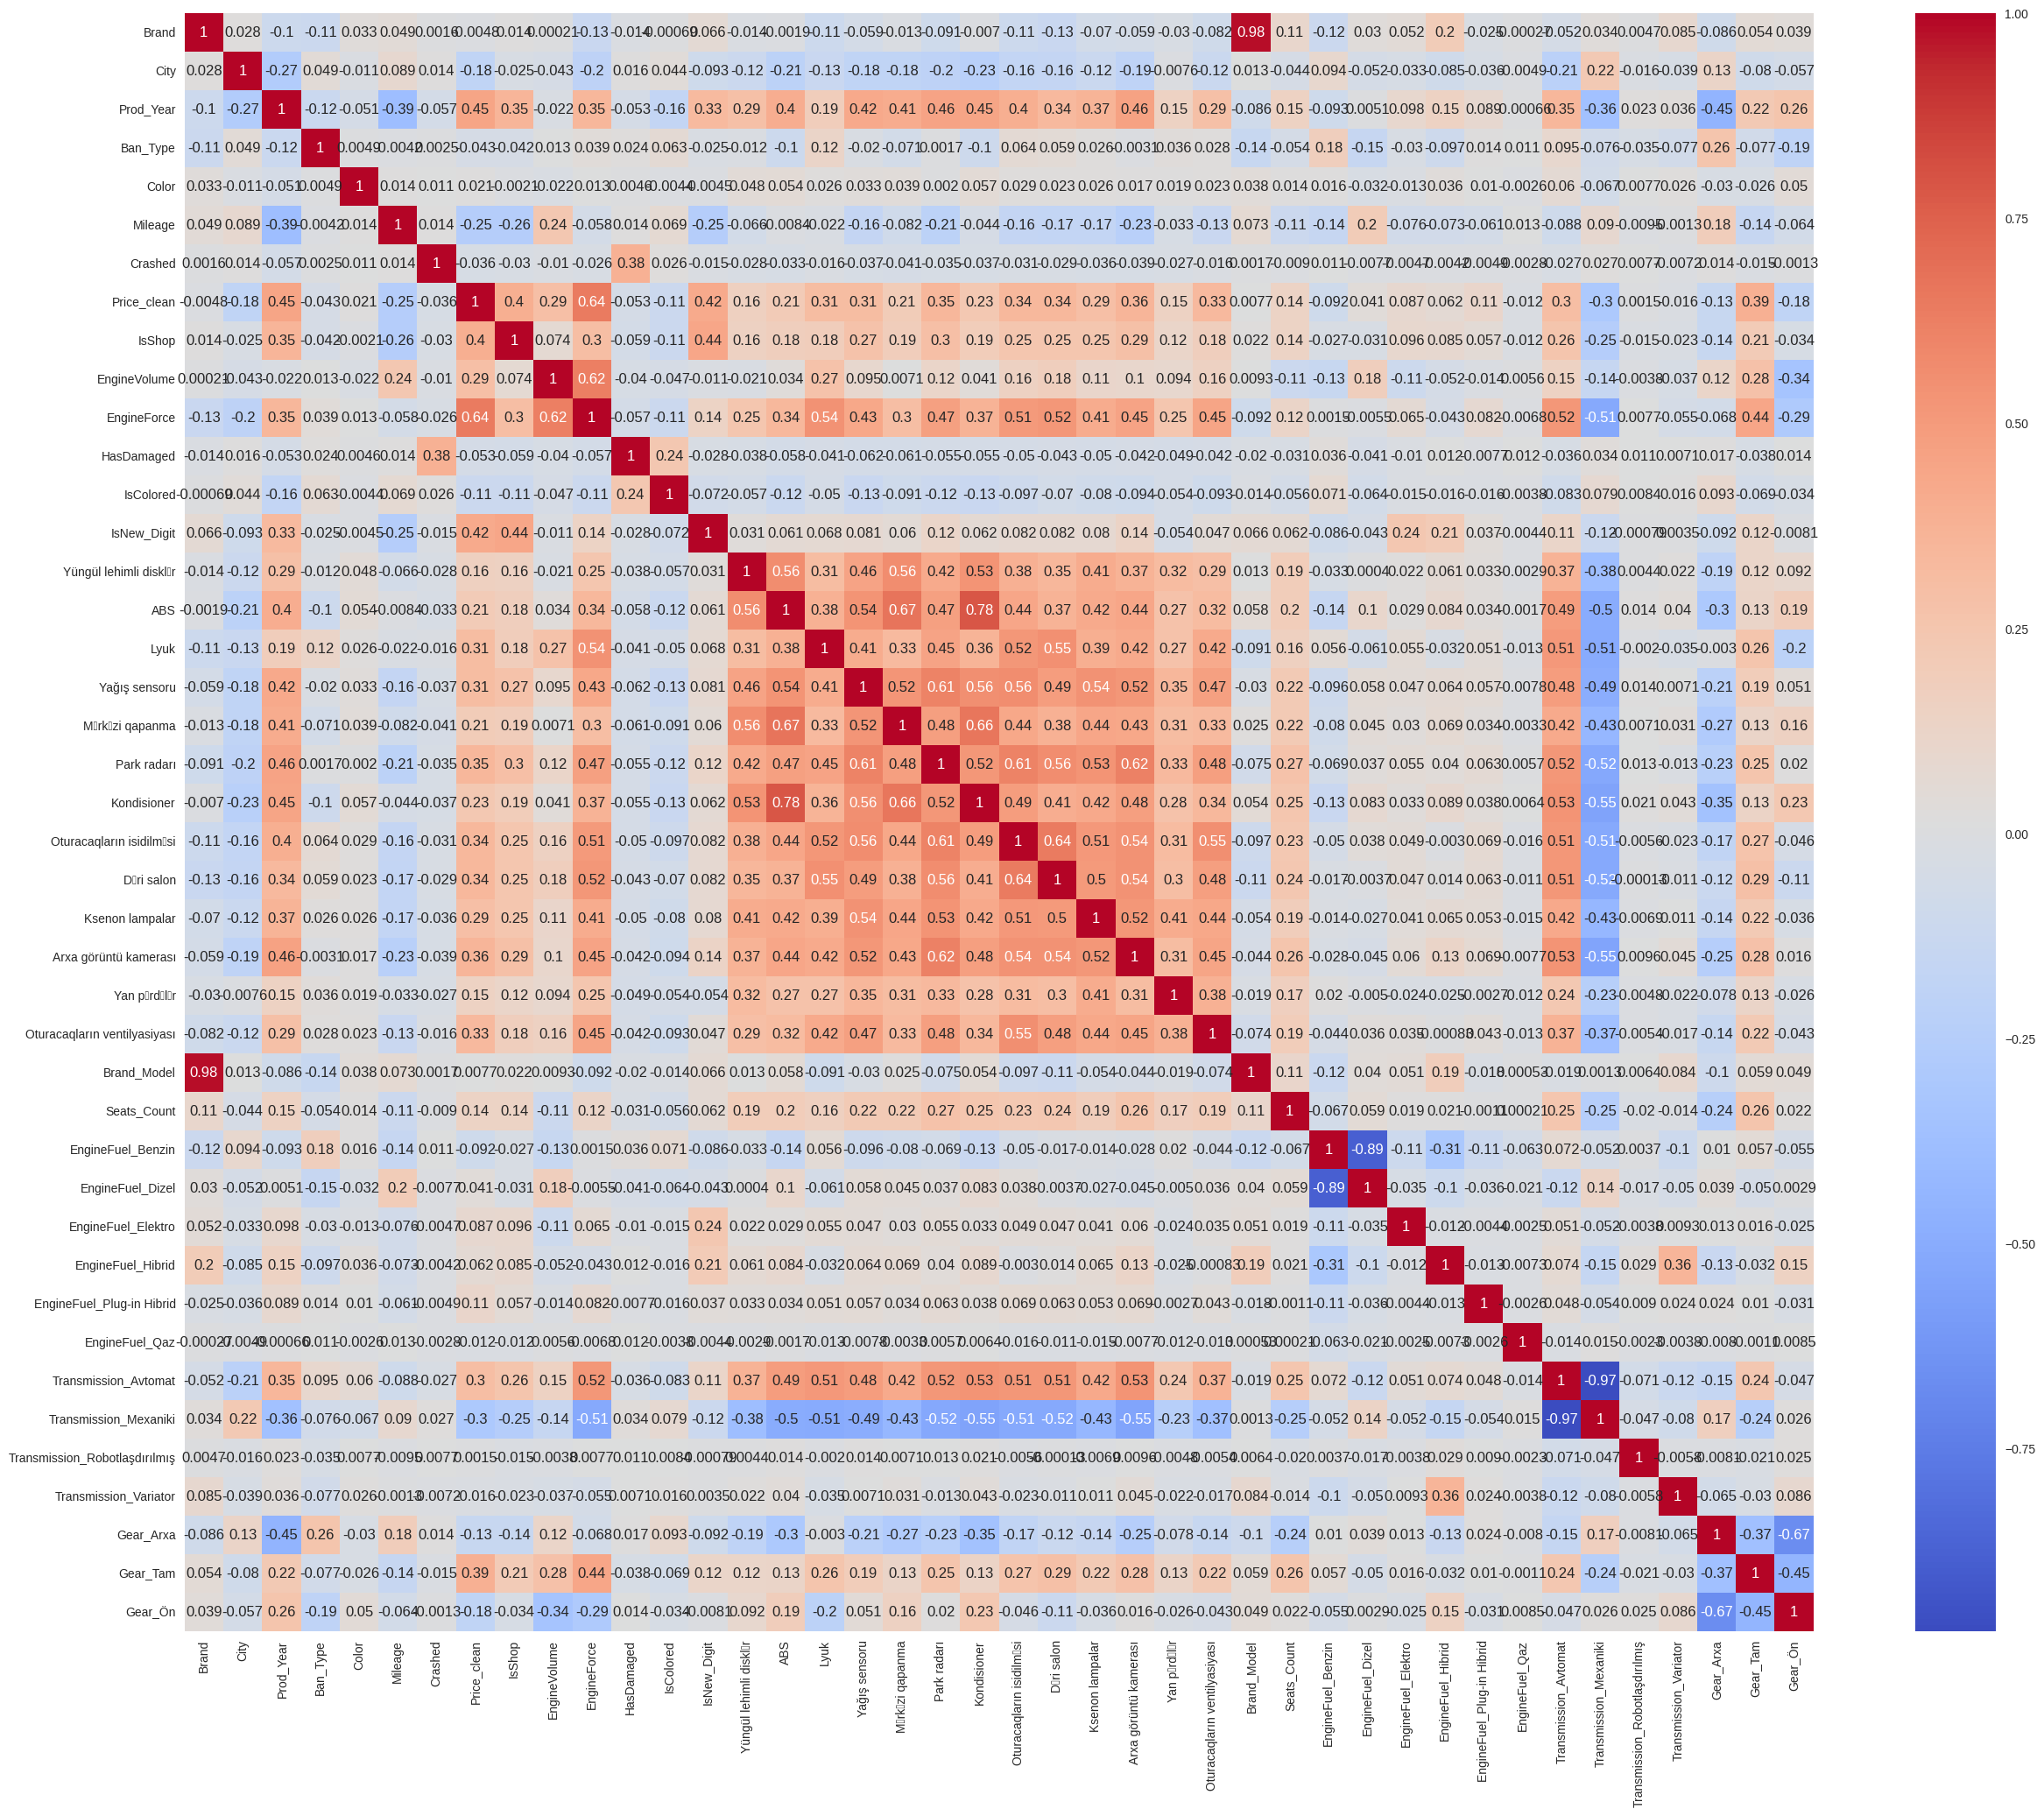

In [23]:
fig, ax = plt.subplots(figsize=(30,24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [24]:
Data_for_Fuzzy_C_Means_clustering = data[['EngineVolume', 'EngineForce']]

Elbow Method to determine the number of clusters to be formed:


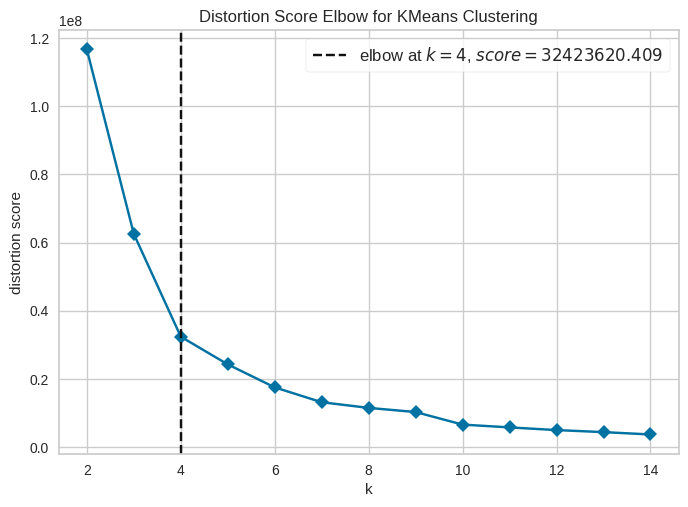

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=14, timings=False)
Elbow_M.fit(Data_for_Fuzzy_C_Means_clustering)
Elbow_M.show()

In [26]:
Data_for_Fuzzy_C_Means_clustering.head()

,EngineVolume,EngineForce
0,1.4,180
1,1.4,200
2,1.4,180
3,3.7,300
4,3.7,300


In [27]:
scaler = StandardScaler()

normalized_df_for_clustering = scaler.fit_transform(Data_for_Fuzzy_C_Means_clustering)

normalized_df_for_clustering = pd.DataFrame(normalized_df_for_clustering, columns=Data_for_Fuzzy_C_Means_clustering.columns)

normalized_df_for_clustering.head()

,EngineVolume,EngineForce
0,-0.613134,0.225133
1,-0.613134,0.448830
2,-0.613134,0.225133
3,1.100484,1.567318
4,1.100484,1.567318


In [28]:
X = normalized_df_for_clustering

n_clusters = 5
fuzziness = 2
max_iter = 100

cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(X.T, n_clusters, fuzziness, error=0.005, maxiter=max_iter, init=None)

clusters = np.argmax(u, axis=0)

data['Fuzzy_C_Means'] = clusters
for i in range(n_clusters):
    data[f"Membership_{i}"] = u[i]

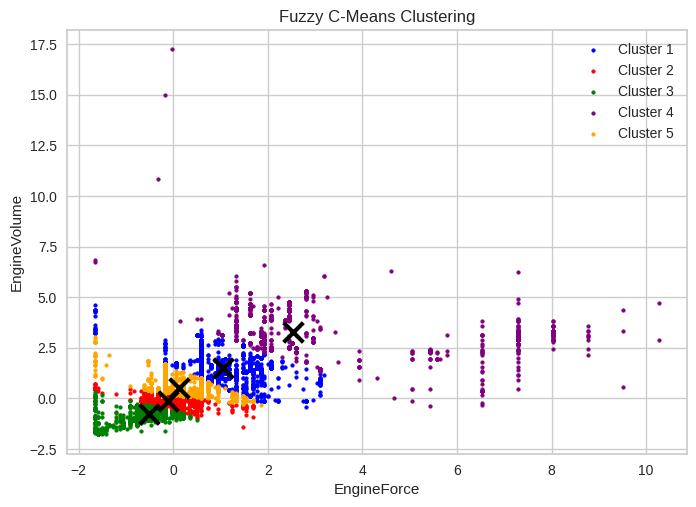

In [29]:
cluster_df = pd.DataFrame(normalized_df_for_clustering, columns=['EngineVolume', 'EngineForce'])
cluster_df['cluster'] = clusters
centers = cntr.T

fig, ax = plt.subplots()
colors = ['blue', 'red', 'green', 'purple', 'orange']

for i in range(5):
    points = np.array(cluster_df[cluster_df['cluster'] == i][['EngineVolume', 'EngineForce']])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=f'Cluster {i+1}')

for i in range(5):
    ax.scatter(cntr[i][0], cntr[i][1], marker='x', s=200, linewidths=3, color='black')

ax.set_ylabel('EngineVolume')
ax.set_xlabel('EngineForce')
ax.set_title('Fuzzy C-Means Clustering')
ax.legend()
plt.show()

In [30]:
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)

ch_score = calinski_harabasz_score(X, clusters)
print("Calinski-Harabasz Score:", ch_score)

db_score = davies_bouldin_score(X, clusters)
print("Davies-Bouldin Skorscore:", db_score)

Silhouette Score: 0.412596674875521
Calinski-Harabasz Score: 32236.848644213143
Davies-Bouldin Skorscore: 0.985842636596654


In [31]:
data['Fuzzy_C_Means']

,Fuzzy_C_Means
0,1
1,4
2,1
3,0
4,0
...,...
39743,2
39744,2
39745,2
39746,2


In [32]:
fuzzy_c_means = data['Fuzzy_C_Means']
price_clean = data['Price_clean']
fuzzy_c_means.corr(price_clean)

0.03530926675892887

In [33]:
data.head()

,Brand,City,Prod_Year,Ban_Type,Color,Mileage,Crashed,Price_clean,IsShop,EngineVolume,EngineForce,HasDamaged,IsColored,IsNew_Digit,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,Brand_Model,Seats_Count,EngineFuel_Benzin,EngineFuel_Dizel,EngineFuel_Elektro,EngineFuel_Hibrid,EngineFuel_Plug-in Hibrid,EngineFuel_Qaz,Transmission_Avtomat,Transmission_Mexaniki,Transmission_Robotlaşdırılmış,Transmission_Variator,Gear_Arxa,Gear_Tam,Gear_Ön,Fuzzy_C_Means,Membership_0,Membership_1,Membership_2,Membership_3,Membership_4
0,0,7,2012,3,8,163000,0,17300,0.0,1.4,180,0.0,0.0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,3,True,False,False,False,False,False,False,True,False,False,False,False,True,1,0.041782,0.479568,0.174601,0.009463,0.294587
1,0,7,2013,3,8,150000,0,18000,1.0,1.4,200,0.0,0.0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,3,True,False,False,False,False,False,False,True,False,False,False,False,True,4,0.057228,0.375418,0.142004,0.012260,0.413091
2,0,7,2017,3,14,56500,0,29750,0.0,1.4,180,0.0,0.0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,3,True,False,False,False,False,False,True,False,False,False,False,False,True,1,0.041782,0.479568,0.174601,0.009463,0.294587
3,1,7,2011,13,0,70000,0,32300,1.0,3.7,300,0.0,0.0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,6,True,False,False,False,False,False,True,False,False,False,False,True,False,0,0.990812,0.002047,0.001081,0.001774,0.004287
4,1,7,2012,13,0,69900,0,33150,0.0,3.7,300,0.0,0.0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,6,True,False,False,False,False,False,True,False,False,False,False,True,False,0,0.990812,0.002047,0.001081,0.001774,0.004287


In [34]:
df = data.drop(["Membership_0", "Membership_1","Membership_2","Membership_3","Membership_4"], axis=1)
data = data.drop(["Membership_0", "Membership_1","Membership_2","Membership_3","Membership_4"], axis=1)

In [35]:
X = data.drop('Price_clean', axis=1)
y = data['Price_clean']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=36)

In [37]:
data.head()

,Brand,City,Prod_Year,Ban_Type,Color,Mileage,Crashed,Price_clean,IsShop,EngineVolume,EngineForce,HasDamaged,IsColored,IsNew_Digit,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,Brand_Model,Seats_Count,EngineFuel_Benzin,EngineFuel_Dizel,EngineFuel_Elektro,EngineFuel_Hibrid,EngineFuel_Plug-in Hibrid,EngineFuel_Qaz,Transmission_Avtomat,Transmission_Mexaniki,Transmission_Robotlaşdırılmış,Transmission_Variator,Gear_Arxa,Gear_Tam,Gear_Ön,Fuzzy_C_Means
0,0,7,2012,3,8,163000,0,17300,0.0,1.4,180,0.0,0.0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,3,True,False,False,False,False,False,False,True,False,False,False,False,True,1
1,0,7,2013,3,8,150000,0,18000,1.0,1.4,200,0.0,0.0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,3,True,False,False,False,False,False,False,True,False,False,False,False,True,4
2,0,7,2017,3,14,56500,0,29750,0.0,1.4,180,0.0,0.0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,3,True,False,False,False,False,False,True,False,False,False,False,False,True,1
3,1,7,2011,13,0,70000,0,32300,1.0,3.7,300,0.0,0.0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,6,True,False,False,False,False,False,True,False,False,False,False,True,False,0
4,1,7,2012,13,0,69900,0,33150,0.0,3.7,300,0.0,0.0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,6,True,False,False,False,False,False,True,False,False,False,False,True,False,0


In [38]:
model = RandomForestRegressor()

In [39]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
r2_score(y_test, model.predict(X_test))

0.9046923671883589

In [41]:
x_tr = model.predict(X_train)

In [42]:
r2_score(y_train,x_tr)

0.9930410062162238

In [43]:
x_te = model.predict(X_test)

In [44]:
r2_score(y_test,x_te)

0.9046923671883589

In [45]:
mean_absolute_error(y_test,x_te)

3153.696051985669

In [46]:
x_te[100]

10909.615

In [47]:
y_test.iloc[100]

11600

In [48]:
feature_importance = pd.DataFrame({'Feature_name':model.feature_names_in_, 'important':model.feature_importances_})

In [49]:
feature_importance

,Feature_name,important
0,Brand,0.011317
1,City,0.000330
2,Prod_Year,0.203997
3,Ban_Type,0.005503
4,Color,0.003650
5,Mileage,0.196603
6,Crashed,0.000113
7,IsShop,0.001327
8,EngineVolume,0.072689
9,EngineForce,0.439635


Text(0, 0.5, 'Feature Importants')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 601 (\N{LATIN SMALL LETTER SCHWA}) missing from font(s) Liberation Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 601 (\N{LATIN SMALL LETTER SCHWA}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


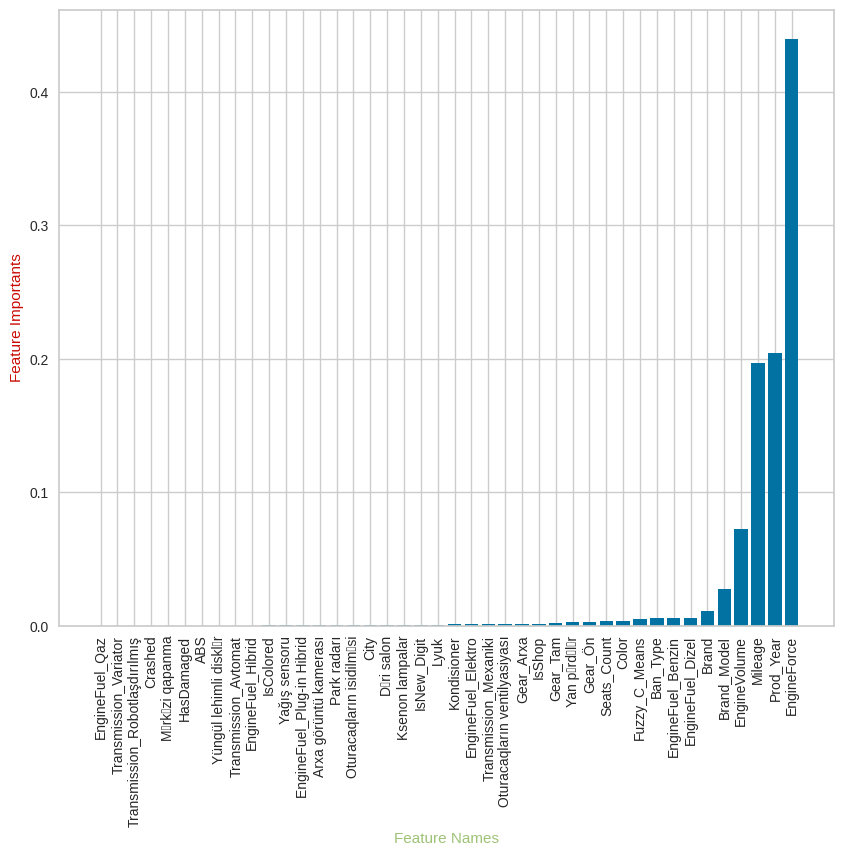

In [50]:
plt.figure(figsize=(10,8))
plt.bar(x=feature_importance.sort_values(['important'])['Feature_name'],height=feature_importance.sort_values(['important'])['important'])
plt.xticks(rotation='vertical')
plt.xlabel('Feature Names',c='g')
plt.ylabel('Feature Importants',c='r')

Fuzzy KNN regression


In [51]:
# calculate the Minkowski distance (when p=2 we can apply the Euclidean distance) --> use p=2 for KNNreg, FKNNreg
def minkowski_distance(a, b, p):
	return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)

# find the most similar neighbors
def get_neighbors(xtrain, ytrain, test_sample, K, p):
	distances = list()
	for t in range(len(xtrain)):
		dist  = minkowski_distance(test_sample, xtrain[t], p)
		distances.append((ytrain[t], dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(K):
		neighbors.append(distances[i]) # neighbors[0]=y values of neighbors, neighbors[1]=distances
	return neighbors

# calculate fuzzy memberships for the neighbors
def get_memberships(neighbors):
    m = 2
    memberships = list()
    for neighbor in neighbors:
        if neighbor[1] == 0:
            memberships.append(0)
        else:
            memberships.append(neighbor[1]**(-1/(m-1)))
    return(memberships)

# calculate fuzzy weighted average of the outputs of the nearest neighbors (i.e., prediction)
def get_prediction(memberships, neighbors):
    train_y = list()
    for neighbor in neighbors:
        train_y.append(neighbor[0])
    products      = [a * b for a, b in zip(memberships, train_y)]
    predicted_val = sum(products)/sum(memberships)
    return predicted_val


# Functions for the nearest neighbor regression methods
#...............................................................................................................
# Minkowski distance-based Fuzzy k-nearest neighbor regression (Md-FKNNreg) function:
def Md_FKNNreg(xtrain, ytrain, xtest, K, p):
    yhat_mdfknn = list()
    for test_sample in xtest:
        mdfknn_neighbors  = get_neighbors(xtrain, ytrain, test_sample, K, p)
        mem_mdfknn        = get_memberships(mdfknn_neighbors)
        mdfknn_prediction = get_prediction(mem_mdfknn, mdfknn_neighbors)
        yhat_mdfknn.append(mdfknn_prediction)
    return yhat_mdfknn


# Fuzzy k-nearest neighbor regression (FKNNreg) function:
def FKNNreg(xtrain, ytrain, xtest, K, p=2):
    yhat_fknn = list()
    for test_sample in xtest:
        fknn_neighbors   = get_neighbors(xtrain, ytrain, test_sample, K, p)
        fknn_memberships = get_memberships(fknn_neighbors)
        fknn_preidiction = get_prediction(fknn_memberships,fknn_neighbors)
        yhat_fknn.append(fknn_preidiction)
    return yhat_fknn


# K-nearest neighbor regression (KNNreg) function:
def KNNreg(xtrain, ytrain, xtest, K, p=2):
    yhat_knn = list()
    for test_sample in xtest:
        knn_neighbors      = get_neighbors(xtrain, ytrain, test_sample, K, p)
        knn_memberships    = np.ones(K)
        knn_preidiction    = get_prediction(knn_memberships,knn_neighbors)
        yhat_knn.append(knn_preidiction)
    return yhat_knn

In [52]:
cols_to_normalize = ['Prod_Year', 'Mileage', 'EngineVolume', 'EngineForce']

mean = np.mean(df[cols_to_normalize], axis=0)
std = np.std(df[cols_to_normalize], axis=0)

df[cols_to_normalize] = (df[cols_to_normalize] - mean) / std

df.head()

,Brand,City,Prod_Year,Ban_Type,Color,Mileage,Crashed,Price_clean,IsShop,EngineVolume,EngineForce,HasDamaged,IsColored,IsNew_Digit,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,Brand_Model,Seats_Count,EngineFuel_Benzin,EngineFuel_Dizel,EngineFuel_Elektro,EngineFuel_Hibrid,EngineFuel_Plug-in Hibrid,EngineFuel_Qaz,Transmission_Avtomat,Transmission_Mexaniki,Transmission_Robotlaşdırılmış,Transmission_Variator,Gear_Arxa,Gear_Tam,Gear_Ön,Fuzzy_C_Means
0,0,7,0.522538,3,8,-0.249072,0,17300,0.0,-0.613134,0.225133,0.0,0.0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,3,True,False,False,False,False,False,False,True,False,False,False,False,True,1
1,0,7,0.632339,3,8,-0.328679,0,18000,1.0,-0.613134,0.448830,0.0,0.0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,3,True,False,False,False,False,False,False,True,False,False,False,False,True,4
2,0,7,1.071544,3,14,-0.901234,0,29750,0.0,-0.613134,0.225133,0.0,0.0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,3,True,False,False,False,False,False,True,False,False,False,False,False,True,1
3,1,7,0.412737,13,0,-0.818565,0,32300,1.0,1.100484,1.567318,0.0,0.0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,6,True,False,False,False,False,False,True,False,False,False,False,True,False,0
4,1,7,0.522538,13,0,-0.819178,0,33150,0.0,1.100484,1.567318,0.0,0.0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,6,True,False,False,False,False,False,True,False,False,False,False,True,False,0


In [56]:
import pandas as pd

# Hər modelin sayını hesablayırıq
brand_counts = df['Brand_Model'].value_counts()

# 750-dən az olan modelləri seçirik
low_count_brands = brand_counts[brand_counts < 750].index

# Yeni DataFrame-ləri yaradırıq
new_data = df[df['Brand_Model'].isin(low_count_brands)]
df = df[~df['Brand_Model'].isin(low_count_brands)]

In [54]:
df

,Brand,City,Prod_Year,Ban_Type,Color,Mileage,Crashed,Price_clean,IsShop,EngineVolume,EngineForce,HasDamaged,IsColored,IsNew_Digit,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,Brand_Model,Seats_Count,EngineFuel_Benzin,EngineFuel_Dizel,EngineFuel_Elektro,EngineFuel_Hibrid,EngineFuel_Plug-in Hibrid,EngineFuel_Qaz,Transmission_Avtomat,Transmission_Mexaniki,Transmission_Robotlaşdırılmış,Transmission_Variator,Gear_Arxa,Gear_Tam,Gear_Ön,Fuzzy_C_Means
0,0,7,0.522538,3,8,-0.249072,0,17300,0.0,-0.613134,0.225133,0.0,0.0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,3,True,False,False,False,False,False,False,True,False,False,False,False,True,1
1,0,7,0.632339,3,8,-0.328679,0,18000,1.0,-0.613134,0.448830,0.0,0.0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,3,True,False,False,False,False,False,False,True,False,False,False,False,True,4
2,0,7,1.071544,3,14,-0.901234,0,29750,0.0,-0.613134,0.225133,0.0,0.0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,3,True,False,False,False,False,False,True,False,False,False,False,False,True,1
3,1,7,0.412737,13,0,-0.818565,0,32300,1.0,1.100484,1.567318,0.0,0.0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,6,True,False,False,False,False,False,True,False,False,False,False,True,False,0
4,1,7,0.522538,13,0,-0.819178,0,33150,0.0,1.100484,1.567318,0.0,0.0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,6,True,False,False,False,False,False,True,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39743,154,7,0.742141,12,13,-1.112497,0,2400,0.0,-1.507196,-1.687481,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1552,1,True,False,False,False,False,False,False,True,False,False,True,False,False,2
39744,154,21,0.742141,12,13,-1.242623,0,1500,0.0,-1.507196,-1.653926,0.0,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1553,1,True,False,False,False,False,False,False,True,False,False,True,False,False,2
39745,154,48,1.510748,12,9,-1.203126,0,4600,0.0,-1.507196,-1.452599,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1554,1,True,False,False,False,False,False,False,True,False,False,True,False,False,2
39746,154,7,1.400947,12,3,-1.045138,0,3700,0.0,-1.581701,-1.620372,0.0,0.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1554,1,True,False,False,False,False,False,False,True,False,False,True,False,False,2


In [57]:
df = pd.DataFrame(df)

# drop the 'Price_clean' column and assign the resulting DataFrame to X
X = df.drop(['Price_clean'], axis=1).values

# assign the 'Price_clean' column to y
y = df['Price_clean'].values

# split the data into training and test with a 80/20 split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

K      = 10 # define the number of nearest neighbors


#----------- Run the nearest neighbor regression methods---------

# Md-FKNNreg
p = 5 # one can run Md_FKNNreg method for different values of p
yhat_mdfknn = Md_FKNNreg(xtrain, ytrain, xtest, K, p)

# FKNNreg
yhat_fknn   = FKNNreg(xtrain, ytrain, xtest, K)

# KNNreg
yhat_knn    = KNNreg(xtrain, ytrain, xtest, K)


# Accuracy measures - Md-FKNNreg
mse_f1 = np.mean((ytest - yhat_mdfknn)**2) # mean square error
mae_f1 = mean_absolute_error(ytest, yhat_mdfknn) # mean absolute error
rmse_f1 = np.sqrt(mse_f1) # root mean square error
r2_f1 = 1 - (sum((ytest - yhat_mdfknn)**2) / sum((ytest - np.mean(ytest))**2)) # R2 value

# Accuracy measures - FKNNreg
mse_f2 = np.mean((ytest - yhat_fknn)**2)
mae_f2 = mean_absolute_error(ytest, yhat_fknn)
rmse_f2 = np.sqrt(mse_f2)
r2_f2 = 1 - (sum((ytest - yhat_fknn)**2) / sum((ytest - np.mean(ytest))**2))

# Accuracy measures - KNNreg
mse_f3 = np.mean((ytest - yhat_knn)**2)
mae_f3 = mean_absolute_error(ytest, yhat_knn)
rmse_f3 = np.sqrt(mse_f3)
r2_f3 = 1 - (sum((ytest - yhat_knn)**2) / sum((ytest - np.mean(ytest))**2))

# print the results
print("Md-FKNNreg Results:")
print("MSE:", mse_f1)
print("MAE:", mae_f1)
print("RMSE:", rmse_f1)
print("R-Squared:", r2_f1)
print("")

print("FKNNreg Results:")
print("MSE:", mse_f2)
print("MAE:", mae_f2)
print("RMSE:", rmse_f2)
print("R-Squared:", r2_f2)
print("")

print("KNNreg Results:")
print("MSE:", mse_f3)
print("MAE:", mae_f3)
print("RMSE:", rmse_f3)
print("R-Squared:", r2_f3)


Md-FKNNreg Results:
MSE: 23237902.255108017
MAE: 2618.496151213878
RMSE: 4820.57073956062
R-Squared: 0.8591053163074067

FKNNreg Results:
MSE: 20629181.322083924
MAE: 2493.73621020563
RMSE: 4541.935856227378
R-Squared: 0.874922359802367

KNNreg Results:
MSE: 22671377.814406306
MAE: 2612.2414181204276
RMSE: 4761.447029465549
R-Squared: 0.8625402340121342


In [ ]:
ytest[159]

7300

In [ ]:
print(yhat_mdfknn[159])
print(yhat_fknn[159])
print(yhat_knn[159])

7438.425899960624
7469.862313737608
7420.0
